In [1686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1687]:
import yfinance as yf
import datetime as dt

In [1688]:
stock = ['INFY.NS']
start = dt.datetime(2020,1,1)
end = dt.datetime(2025,1,1)

In [1689]:
all_data = []

In [1690]:
def get_stock(stock,start,end):
    
    for stock_id in stock:
        
        df = yf.download(stock_id, start=start, end=end)
        df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  
        df['Date'] = df.index
        df['stock_id'] = stock_id
        df.reset_index(drop=True, inplace=True)
        all_data.append(df)
        
    if all_data:
            return pd.concat(all_data, ignore_index=True)
    return pd.DataFrame()

In [1691]:
df = get_stock(stock,start,end)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27360\4235868153.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [1692]:
df.reset_index()
df.columns = df.columns.droplevel(1)
df['Date'] = pd.to_datetime(df['Date'])

In [1693]:
df.head()


Price,Open,High,Low,Close,Volume,Date,stock_id
0,650.393981,654.818430,648.225991,652.031006,2112415,2020-01-01,INFY.NS
1,653.845088,655.526346,646.765970,650.128540,5658200,2020-01-02,INFY.NS
2,649.420662,661.897587,649.420662,660.127808,7882938,2020-01-03,INFY.NS
3,660.216170,667.029832,651.721251,653.800720,6519403,2020-01-06,INFY.NS
4,653.048694,657.119165,641.633593,644.111328,7899363,2020-01-07,INFY.NS


In [1694]:
from finta import TA

In [1695]:
df['ema_10'] = TA.EMA(df, 10)
df['ema_20'] = TA.EMA(df, 20)
df['rsi'] = TA.RSI(df)
df['macd'] = TA.MACD(df)['MACD']
df['bb_upper'] = TA.BBANDS(df)['BB_UPPER']
df['bb_lower'] = TA.BBANDS(df)['BB_LOWER']
df['Return'] = df['Close'].pct_change()
df['macd_signal'] = TA.MACD(df)['SIGNAL']

In [1696]:
df.isna().sum()

Price
Open            0
High            0
Low             0
Close           0
Volume          0
Date            0
stock_id        0
ema_10          0
ema_20          0
rsi             1
macd            0
bb_upper       19
bb_lower       19
Return          1
macd_signal     0
dtype: int64

In [1697]:
df.dropna(inplace= True)

In [1698]:
df.isna().sum()

Price
Open           0
High           0
Low            0
Close          0
Volume         0
Date           0
stock_id       0
ema_10         0
ema_20         0
rsi            0
macd           0
bb_upper       0
bb_lower       0
Return         0
macd_signal    0
dtype: int64

In [1699]:
df.head()

Price,Open,High,Low,Close,Volume,Date,stock_id,ema_10,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal
19,691.098944,691.806845,683.134936,688.444275,5121009,2020-01-28,INFY.NS,683.428577,678.077695,65.439825,5.563498,707.502978,632.587360,-0.000128,4.546687
20,696.054234,701.540561,693.974765,698.797424,6832757,2020-01-29,INFY.NS,686.264850,680.325817,70.718178,6.162029,710.929410,633.837570,0.015038,4.872763
21,698.797443,698.797443,688.444222,690.833435,3859680,2020-01-30,INFY.NS,687.105674,681.450986,62.775686,6.017801,712.309897,636.527573,-0.011397,5.103473
22,690.700720,694.594257,682.780946,686.630249,6092028,2020-01-31,INFY.NS,687.018369,681.999097,59.008860,5.549047,713.383526,638.104188,-0.006084,5.193117
23,691.983636,699.903408,676.498069,679.064270,6416745,2020-02-03,INFY.NS,685.560361,681.691765,52.860154,4.599342,713.214474,640.799594,-0.011019,5.073798


In [1700]:
df.describe(include='number')

Price,Open,High,Low,Close,Volume,ema_10,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal
count,1219.000000,1219.000000,1219.000000,1219.000000,1.219000e+03,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,1345.211629,1358.296859,1331.910208,1345.136536,7.500914e+06,1340.674404,1335.660915,54.181970,6.977385,1408.899426,1262.231166,0.000967,6.941315
std,330.532058,332.076986,328.157417,330.376205,5.166423e+06,329.312625,328.181918,12.957627,24.947725,341.643022,320.837951,0.017586,23.540571
min,450.630186,493.768569,450.630186,465.850220,3.719660e+05,527.691653,559.940816,14.589462,-66.510796,599.872113,425.663878,-0.100393,-58.898224
25%,1213.898009,1224.416616,1200.843346,1213.172791,4.693163e+06,1212.181870,1217.001596,45.790534,-7.048573,1268.234428,1146.196157,-0.008401,-6.197035
50%,1401.128837,1412.447561,1387.943989,1401.864624,6.265593e+06,1397.433188,1399.943175,55.038926,9.556271,1460.430934,1324.586320,0.000910,9.892183
75%,1561.868082,1578.340722,1545.773556,1563.001770,8.710219e+06,1560.616546,1554.142311,63.184989,23.757874,1631.543102,1464.566513,0.009905,23.051951
max,1967.763256,1978.610690,1950.160948,1971.954346,9.043211e+07,1932.932295,1905.744755,88.137008,82.444299,1992.808738,1838.198715,0.120334,75.652393


In [1701]:
import plotly.graph_objects as go
import plotly.io as pio

In [1702]:
pio.renderers.default = 'browser'

fig = go.Figure(data=[
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='green',
        decreasing_line_color='red'
    )
])

fig.update_layout(
    title='INFY.NS Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()

* Closing Price over date :

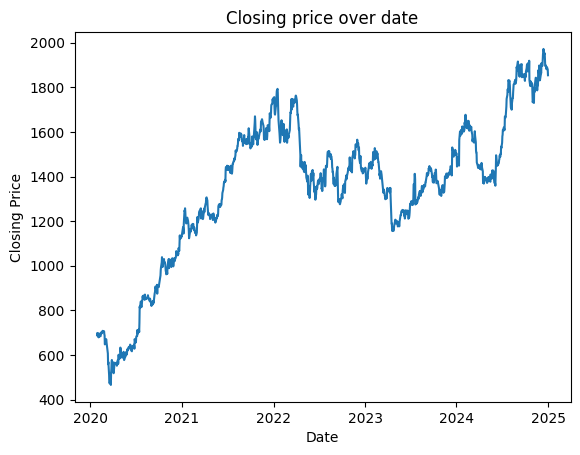

In [1703]:
sns.lineplot(df,x=df['Date'],y=df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing price over date')
plt.show()

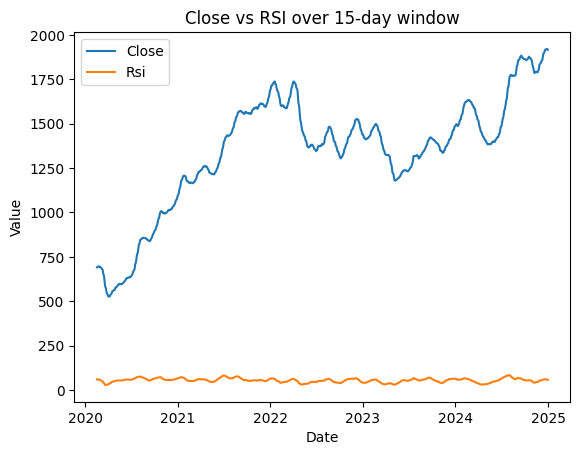

In [1704]:
window_size = 15
sns.lineplot(data= df ,x=df['Date'],y=df['Close'].rolling(window_size).mean(),label='Close')
sns.lineplot(data= df ,x=df['Date'],y=df['rsi'].rolling(window_size).mean(),label='Rsi')
plt.title(f'Close vs RSI over {window_size}-day window')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

## Chart for observing RSI 
if RSI is above 70 it show overbought &
less than 30 shows oversold

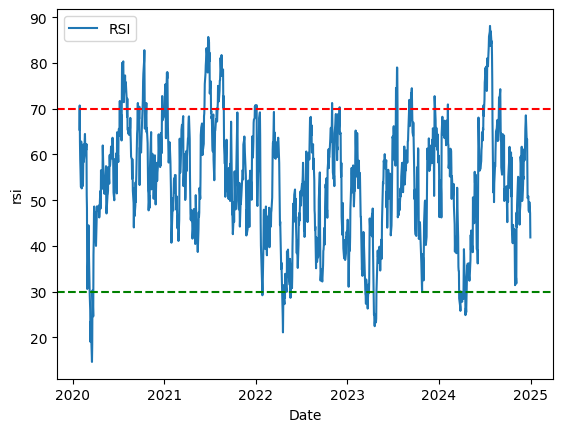

In [1705]:
sns.lineplot(data=df, x='Date', y='rsi', label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()

* Chart shows Exponential Moving Average with date

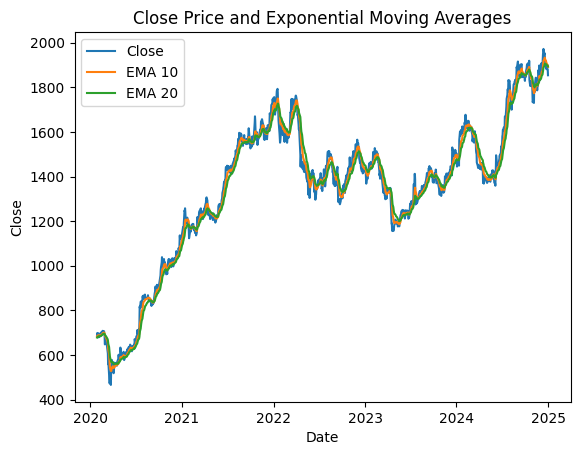

In [1706]:
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='ema_10', label='EMA 10')
sns.lineplot(data=df, x='Date', y='ema_20', label='EMA 20')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Close Price and Exponential Moving Averages")
plt.show()

Same Chart of EMA & close price in plottly for making more intractive

In [1707]:
import plotly.express as px

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ema_10'], mode='lines', name='EMA 10'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['ema_20'], mode='lines', name='EMA 20'))

fig.update_layout(
    title='Price with EMAs',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    hovermode='x unified'
)

fig.show()


## chart for MACD 

It acts as a trigger for buy/sell decisions:

* MACD crosses above the signal line → Buy signal

* MACD crosses below the signal line → Sell signal



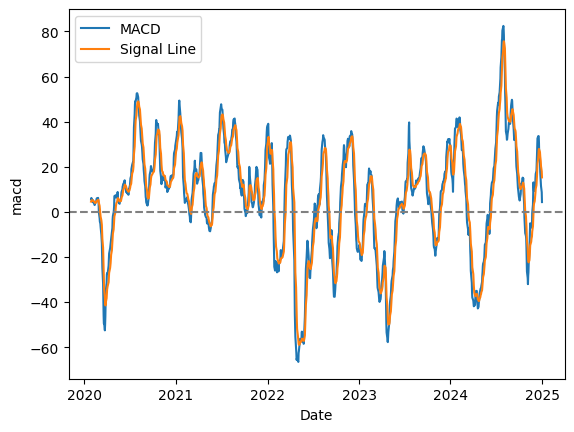

In [1708]:
sns.lineplot(data=df, x='Date', y='macd', label='MACD')
sns.lineplot(data=df, x='Date', y='macd_signal', label='Signal Line')
plt.axhline(0, color='gray', linestyle='--')  # zero line
plt.show()

Same Chart of MACD in plottly for making more intractive

In [1709]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['macd'], mode='lines', name='MACD'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['macd_signal'], mode='lines', name='Signal'))

fig.update_layout(title='MACD vs Signal Line', xaxis_title='Date', yaxis_title='MACD')
fig.show()


## Bollinger Band

Bollinger Bands are a technical analysis tool that visualize volatility and price levels relative to a moving average. They're commonly used to identify:

* Overbought and oversold conditions

* Potential trend reversals

* Periods of low/high volatility

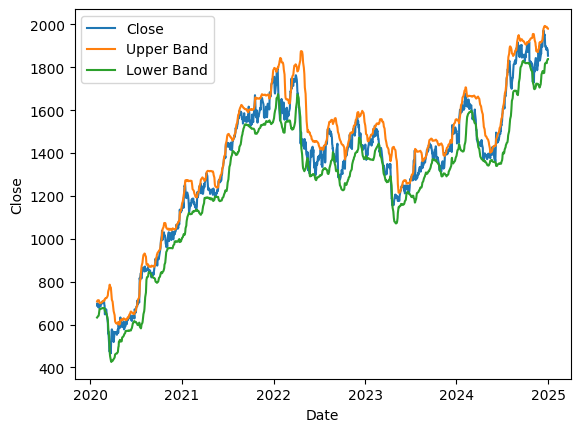

In [1710]:
sns.lineplot(data=df, x='Date', y='Close', label='Close')
sns.lineplot(data=df, x='Date', y='bb_upper', label='Upper Band')
sns.lineplot(data=df, x='Date', y='bb_lower', label='Lower Band')
plt.show()

In [1711]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bb_upper'], name='Upper Band'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['bb_lower'], name='Lower Band'))

fig.update_layout(title='Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
fig.show()


# Correlation Heatmap :

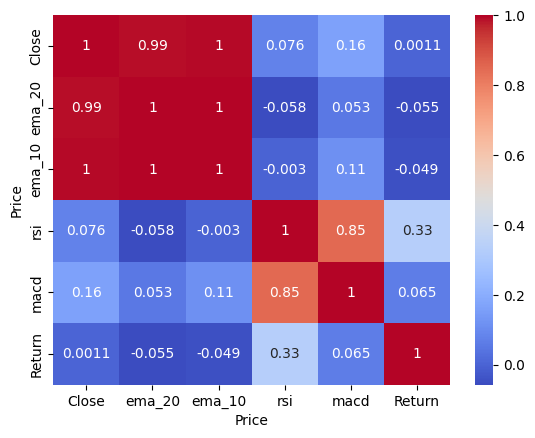

In [1712]:
import seaborn as sns
corr = df[['Close', 'ema_20', 'ema_10', 'rsi', 'macd', 'Return']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


From the heatmap, it was observed that the Exponential Moving Averages with windows of 10 (EMA10) and 20 (EMA20) show a very high correlation and exhibit similar movement patterns over time. Including both may introduce feature redundancy, which can lead to:
* Overfitting in deep learning models
To avoid this, ema_10 has been dropped from the final dataset.

In [1713]:
df.drop(columns=['ema_10'],inplace=True)

In [1714]:
df.head()

Price,Open,High,Low,Close,Volume,Date,stock_id,ema_20,rsi,macd,bb_upper,bb_lower,Return,macd_signal
19,691.098944,691.806845,683.134936,688.444275,5121009,2020-01-28,INFY.NS,678.077695,65.439825,5.563498,707.502978,632.587360,-0.000128,4.546687
20,696.054234,701.540561,693.974765,698.797424,6832757,2020-01-29,INFY.NS,680.325817,70.718178,6.162029,710.929410,633.837570,0.015038,4.872763
21,698.797443,698.797443,688.444222,690.833435,3859680,2020-01-30,INFY.NS,681.450986,62.775686,6.017801,712.309897,636.527573,-0.011397,5.103473
22,690.700720,694.594257,682.780946,686.630249,6092028,2020-01-31,INFY.NS,681.999097,59.008860,5.549047,713.383526,638.104188,-0.006084,5.193117
23,691.983636,699.903408,676.498069,679.064270,6416745,2020-02-03,INFY.NS,681.691765,52.860154,4.599342,713.214474,640.799594,-0.011019,5.073798


This code prepares the dataset for multi-day stock price prediction by shifting the Close price to create future target columns.

In [1715]:
n_days = 3

for i in range(1, n_days + 1):
    df[f'target_day{i}'] = df['Close'].shift(-i)

df.dropna(inplace=True)

target_cols = [f'target_day{i}' for i in range(1, n_days + 1)]

X = df.drop(columns=['Date', 'stock_id'] + target_cols)
y = df[target_cols]


In [1716]:
df.sort_values(by='Date',inplace= True)

In [1717]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

* split data in test and train

In [1718]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

* Scaling Data:

In [1719]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Use Random Forest for prediction and perform hyperparameter tuning.

In [1720]:
model = RandomForestRegressor(random_state=42)
param_dist = {
    "n_estimators": [100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 7, 10]
}

search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_root_mean_squared_error')

search.fit(X_train, y_train)
best_model = search.best_estimator_
preds = best_model.predict(X_test)

print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Test RMSE: {rmse}")


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 10}
Best CV RMSE: 177.2259297990398
Test RMSE: 120.8271714188166


* Chart for Actual Vs. Predicted

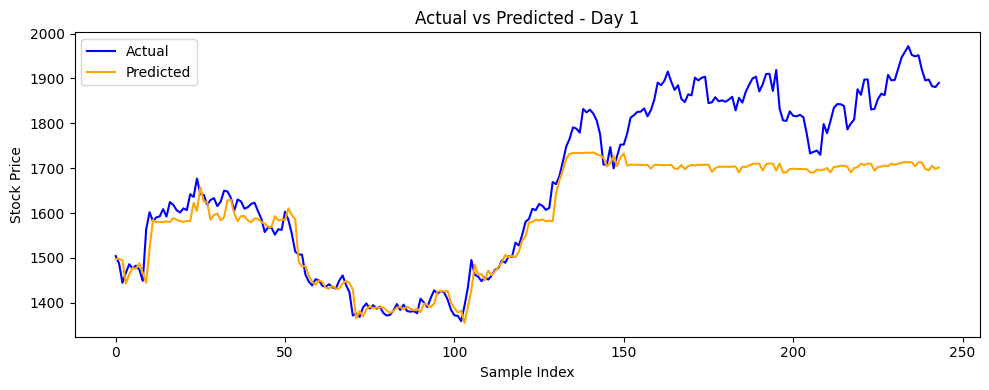

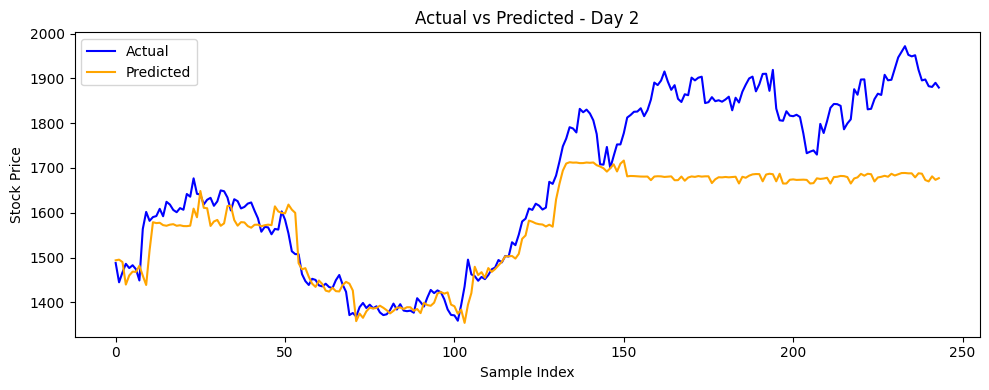

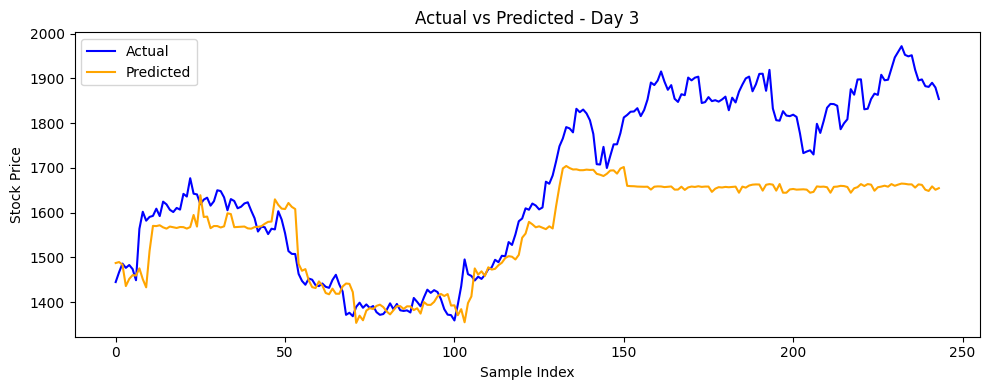

In [1721]:
days = preds.shape[1]

for i in range(days):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values[:, i], label="Actual", color='blue')
    plt.plot(preds[:, i], label="Predicted", color='orange')
    plt.title(f"Actual vs Predicted - Day {i + 1}")
    plt.xlabel("Sample Index")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.tight_layout()
    plt.show()
